<a href="https://colab.research.google.com/github/Srikanthr7/Bio-solar-hybrid-panel/blob/main/Bio_Solar_hybrid_panel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Algae Growth Modeling

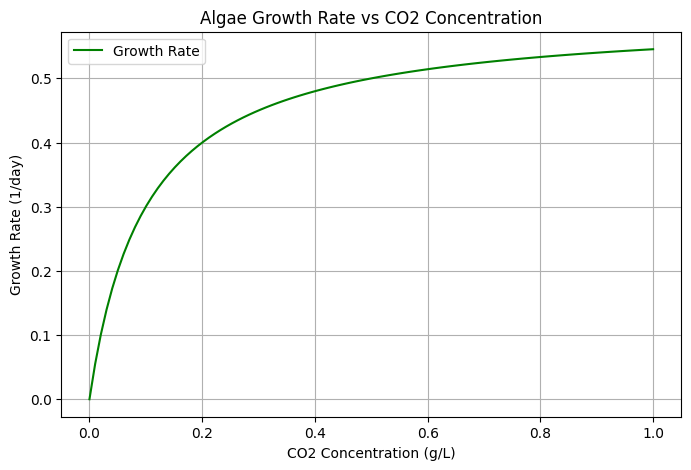

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_max = 0.6  # Maximum growth rate (1/day)
Ks = 0.1      # Half-saturation constant (CO2 concentration in g/L)
S = np.linspace(0, 1, 100)  # CO2 concentration (g/L)

# Monod Equation
mu = mu_max * S / (Ks + S)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(S, mu, label="Growth Rate", color='green')
plt.title("Algae Growth Rate vs CO2 Concentration")
plt.xlabel("CO2 Concentration (g/L)")
plt.ylabel("Growth Rate (1/day)")
plt.grid(True)
plt.legend()
plt.show()


# Heat Transfer Simulation

In [ ]:
# Parameters
mass = 10  # kg (water in bioreactor)
specific_heat = 4186  # J/(kg·K)
delta_T = 5  # Temperature change in Kelvin
waste_heat = 500  # Watts (heat from solar panel)

# Calculate heat transfer
Q = mass * specific_heat * delta_T  # Joules
time_to_heat = Q / waste_heat  # Time to transfer heat (seconds)

print(f"Heat Energy Transferred: {Q/1000:.2f} kJ")
print(f"Time to Heat the Bioreactor: {time_to_heat/60:.2f} minutes")


Heat Energy Transferred: 209.30 kJ
Time to Heat the Bioreactor: 6.98 minutes


#  CO₂ Absorption Simulation

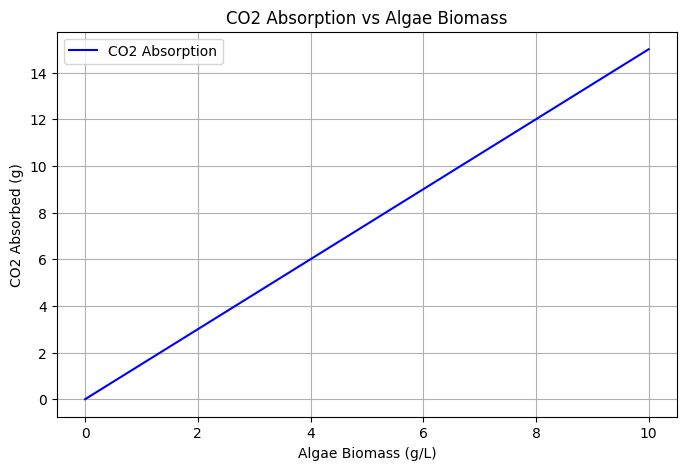

In [ ]:
# Parameters
biomass = np.linspace(0, 10, 100)  # Biomass concentration (g/L)
k = 1.5  # Absorption coefficient (CO2 g/g biomass)

# CO2 Absorbed
co2_absorbed = k * biomass

# Plot
plt.figure(figsize=(8, 5))
plt.plot(biomass, co2_absorbed, label="CO2 Absorption", color='blue')
plt.title("CO2 Absorption vs Algae Biomass")
plt.xlabel("Algae Biomass (g/L)")
plt.ylabel("CO2 Absorbed (g)")
plt.grid(True)
plt.legend()
plt.show()


# Integration of Solar Panel and Algae Bioreactor

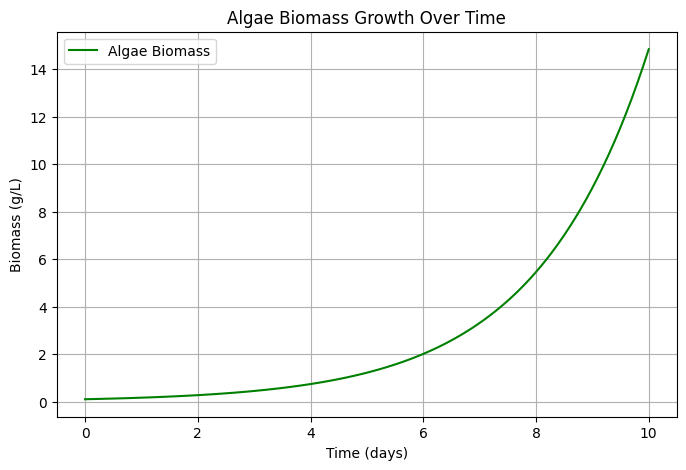

In [ ]:
from scipy.integrate import solve_ivp

# Parameters
def algae_growth(t, y, mu_max, Ks, CO2):
    # Growth rate
    mu = mu_max * CO2 / (Ks + CO2)
    return mu * y

# Initial conditions
y0 = 0.1  # Initial algae biomass (g/L)
CO2 = 0.5  # CO2 concentration (g/L)
t_span = (0, 10)  # Time in days
t_eval = np.linspace(*t_span, 100)

# Solve the ODE
solution = solve_ivp(algae_growth, t_span, [y0], args=(mu_max, Ks, CO2), t_eval=t_eval)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(solution.t, solution.y[0], label="Algae Biomass", color='green')
plt.title("Algae Biomass Growth Over Time")
plt.xlabel("Time (days)")
plt.ylabel("Biomass (g/L)")
plt.grid(True)
plt.legend()
plt.show()


# Visualization of the Workflow

In [ ]:
from graphviz import Digraph

# Create a directed graph
dot = Digraph()

# Add nodes
dot.node("Sunlight")
dot.node("CO2")
dot.node("Solar Panel")
dot.node("Algae Bioreactor")
dot.node("Electricity")
dot.node("Waste Heat")
dot.node("Biomass")
dot.node("Biofuel")

# Add edges
dot.edges([
    ("Sunlight", "Solar Panel"),
    ("Solar Panel", "Electricity"),
    ("Solar Panel", "Waste Heat"),
    ("Waste Heat", "Algae Bioreactor"),
    ("CO2", "Algae Bioreactor"),
    ("Algae Bioreactor", "Biomass"),
    ("Biomass", "Biofuel")
])

# Render the graph
dot.render("workflow_diagram", format="png", cleanup=True)


'workflow_diagram.png'